In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [13]:

df = pd.read_csv("weatherHistory.csv")  


In [14]:

# Preprocess the data
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df.set_index('Formatted Date', inplace=True)
wind_speed = df['Wind Speed (km/h)']

/var/folders/k9/2v1n2cw97z5_1vftpp8ft2br0000gn/T/ipykernel_64362/3069177614.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


In [15]:
train_size = int(len(wind_speed) * 0.8)
train, test = wind_speed[:train_size], wind_speed[train_size:]


In [16]:

# ARIMA model
arima_model = ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:

# Make predictions 
arima_predictions = arima_fit.forecast(steps=len(test))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [18]:

# Calculate RMSE for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test, arima_predictions))


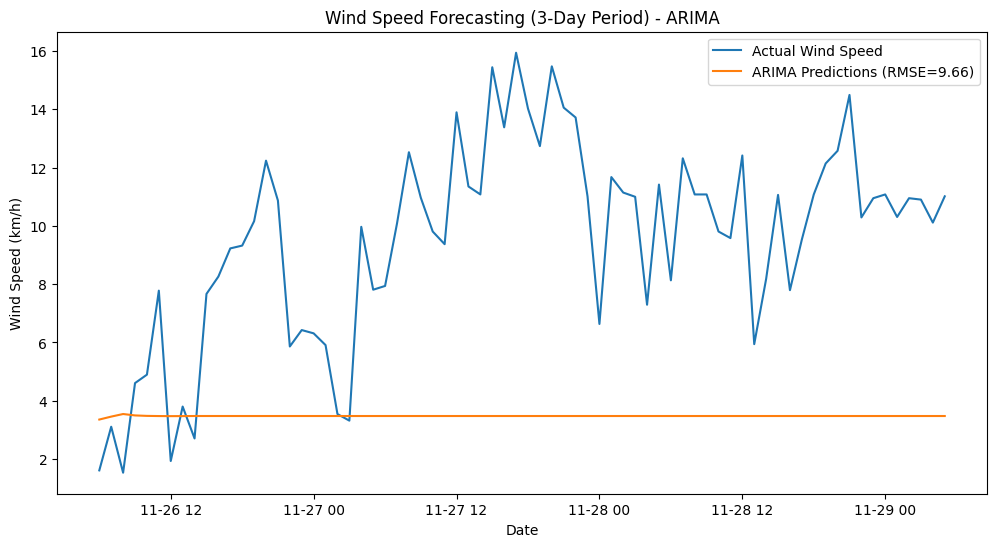

RMSE for ARIMA: 9.660674913416363


In [19]:
# Plot actual vs predicted values for 3 days with ARIMA
plt.figure(figsize=(12, 6))
plt.plot(test.index[:72], test.values[:72], label='Actual Wind Speed')
plt.plot(test.index[:72], arima_predictions[:72], label='ARIMA Predictions (RMSE={:.2f})'.format(arima_rmse))
plt.title('Wind Speed Forecasting (3-Day Period) - ARIMA')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.show()

# Print RMSE for ARIMA
print("RMSE for ARIMA:", arima_rmse)
